In [1]:
from fastai.vision.all import *
from fastai.callback.hook import *

In [2]:
path = untar_data(URLs.CIFAR)

In [3]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)

In [4]:
# Architecture specs. from the CMSIS-NN CIFAR10 example
import shared_model
net = shared_model.create_model()

In [5]:
net

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (8): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (12): Flatten()
  (13): Linear(in_features=512, out_features=10, bias=True)
  (14): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Softmax(dim=None)
)

In [6]:
learn = Learner(dls, net, loss_func=F.cross_entropy, metrics=accuracy)

In [7]:
learn.load("cmsis-nn-cifar10")

&lt;fastai.learner.Learner at 0x7fe9a4960a00&gt;

&lt;IPython.core.display.HTML object&gt;

SuggestedLRs(lr_min=0.2754228591918945, lr_steep=0.10000000149011612)

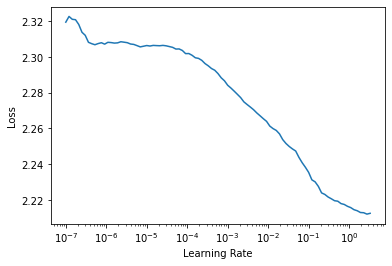

In [7]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(5, lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.743393,1.820555,0.661917,00:15
1,1.733365,1.754838,0.730167,00:15
2,1.720576,1.781738,0.694417,00:15
3,1.701555,1.727952,0.753750,00:15
4,1.679210,1.723320,0.759583,00:15


In [9]:
learn.save("cmsis-nn-cifar10")

Path(&#39;/home/slackr/.fastai/data/cifar10/models/cmsis-nn-cifar10.pth&#39;)

In [8]:
import export_activations

In [9]:
cb = export_activations.Log2HistActivationStats()
learn.validate(cbs=cb)

In [11]:
log2hist = cb.combined_hist()
bn_mean_vars = export_activations.get_bn_running_mean_vars(learn.model)
export_activations.save_run_stats("cmsis-nn-cifar10-run-stats.pt", log2hist, bn_mean_vars)